<a href="https://colab.research.google.com/github/chemvatho/proper_project/blob/main/CLASS__ProPer_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install libraries

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,063 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,677 kB]
Get:13 https://ppa.launchpadcontent.net/c

In [2]:
!pip install 'praatio<5'
!pip install pydub
!pip install praat-parselmouth
!pip install config
!apt-get install praat
!pip install pandas numpy scipy
!pip install ipywidgets
!pip install amfm_decompy
!pip install aubio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 22.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  oss-compat
Suggested packages:
  libasound2-plugins
Recommended packages:
  osspd
The following NEW packages will be installed:
  oss-compat praat
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 15.8 MB of archives.
After this operation, 70.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 oss-compat amd64 7 [5,000 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 praat amd64 6.2.09-1 [15.8 MB]
Fetched 15.8 MB in 3s (4,677 kB/s)
Selecting previously unselected package oss-compat.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../oss-compat

#Directories

In [3]:
from MakingDirectories import DirectoryCreator

# Input directory paths
InDirAudio = "/content/Proper_project/praat_data/audio/"
OutDirIntensityTier = "/content/Proper_project/praat_data/intensity_tiers/"
OutDirPitchObject = "/content/Proper_project/praat_data/pitch_objects/"
OutDirPitchTier = "/content/Proper_project/praat_data/pitch_tiers/"
OutDirTextGrid = "/content/Proper_project/praat_data/textgrids/"

#different path
OutDirDatatable = "/content/Proper_project/data_tables/"
OutDirOutput_csv = "/content/Proper_project/output_csv/"

# Create an instance of DirectoryCreator
dir_creator = DirectoryCreator(
    InDirAudio, OutDirIntensityTier, OutDirPitchObject, OutDirPitchTier,
    OutDirTextGrid, OutDirDatatable, OutDirOutput_csv
)

# Create directories
dir_creator.create_directories()


Directory created: /content/Proper_project/praat_data/audio/
Directory created: /content/Proper_project/praat_data/intensity_tiers/
Directory created: /content/Proper_project/praat_data/pitch_objects/
Directory created: /content/Proper_project/praat_data/pitch_tiers/
Directory created: /content/Proper_project/praat_data/textgrids/
Directory created: /content/Proper_project/data_tables/
Directory created: /content/Proper_project/output_csv/


In [4]:
from loading_audio_textgrid import AudioTextgridLoader

# Example usage:
audio_dir_path = "/content/Proper_project/praat_data/audio"
textgrid_dir_path = "/content/Proper_project/praat_data/textgrids"


loader = AudioTextgridLoader(audio_dir_path, textgrid_dir_path)
loader.print_loaded_audio_prefixes()

Audio File: /content/Proper_project/praat_data/audio/glenn_1.wav
Name Prefix: glenn_1
--------------------------------------------
Audio File: /content/Proper_project/praat_data/audio/AH_1.wav
Name Prefix: AH_1
--------------------------------------------
Audio File: /content/Proper_project/praat_data/audio/DM_1.wav
Name Prefix: DM_1
--------------------------------------------
Audio File: /content/Proper_project/praat_data/audio/Khm_1.wav
Name Prefix: Khm_1
--------------------------------------------
Audio File: /content/Proper_project/praat_data/audio/misc_58.wav
Name Prefix: misc_58
--------------------------------------------
Audio File: /content/Proper_project/praat_data/audio/joe_7.wav
Name Prefix: joe_7
--------------------------------------------


#looking for sound files (.wav)

#Create IntensityTier, PitchObjects, PitchTier


In [5]:
from PitchIntensityExtractor import PitchIntensityExtractor

# Instantiate the class
pitch_intensity_extractor = PitchIntensityExtractor(InDirAudio, OutDirIntensityTier, OutDirPitchObject, OutDirPitchTier)

# Process files
pitch_intensity_extractor.process_files()



Processing complete for sound file: glenn_1.wav
Processing complete for sound file: AH_1.wav
Processing complete for sound file: DM_1.wav
Processing complete for sound file: Khm_1.wav
Processing complete for sound file: misc_58.wav
Processing complete for sound file: joe_7.wav


# Praat pitch

In [26]:
from f0_smooth_praat import Praat_PitchAnalysis

# Your audio directory here

InDirAudio = "/content/Proper_project/praat_data/audio"
OutDirPitchTier = "/content/Proper_project/praat_data/pitch_tiers/"

pitch_analysis = Praat_PitchAnalysis(InDirAudio, OutDirPitchTier)
pitch_analysis.display_widgets()

Dropdown(description='Select Audio File:', options=('glenn_1.wav', 'AH_1.wav', 'DM_1.wav', 'Khm_1.wav', 'misc_…

FloatSlider(value=40.0, description='Pitch Floor:', min=1.0, step=1.0)

FloatSlider(value=10.0, description='Smooth:', min=1.0, step=1.0)

Button(description='Process and Plot', style=ButtonStyle())

Output()

#Preparation your DATA


#Intensity, f0_smooth, and pitchObjects to csv

In [7]:
from Intensity_Pitch_to_csv import AudioProcessor

# Define the directory paths
audio_directory = "/content/Proper_project/praat_data/audio"
intensity_directory = "/content/Proper_project/praat_data/intensity_tiers/"
pitch_directory = "/content/Proper_project/praat_data/pitch_tiers/"

# Create an instance of the AudioProcessor class
processor = AudioProcessor(audio_directory, intensity_directory, pitch_directory)

# Process audio files
fullTime_df, intensity_df, f0_smooth_df = processor.process_audio_files()

# Save the processed data to CSV files
processor.save_to_csv_by_file(fullTime_df, intensity_df, f0_smooth_df)


Full time data for 'glenn_1' saved to /content/Proper_project/data_tables/glenn_1_fullTime_data.csv
Full time data for 'AH_1' saved to /content/Proper_project/data_tables/AH_1_fullTime_data.csv
Full time data for 'DM_1' saved to /content/Proper_project/data_tables/DM_1_fullTime_data.csv
Full time data for 'Khm_1' saved to /content/Proper_project/data_tables/Khm_1_fullTime_data.csv
Full time data for 'misc_58' saved to /content/Proper_project/data_tables/misc_58_fullTime_data.csv
Full time data for 'joe_7' saved to /content/Proper_project/data_tables/joe_7_fullTime_data.csv
Intensity data for 'joe_7' saved to /content/Proper_project/data_tables/joe_7_intensity_data.csv
Intensity data for 'misc_58' saved to /content/Proper_project/data_tables/misc_58_intensity_data.csv
Intensity data for 'DM_1' saved to /content/Proper_project/data_tables/DM_1_intensity_data.csv
Intensity data for 'AH_1' saved to /content/Proper_project/data_tables/AH_1_intensity_data.csv
Intensity data for 'glenn_1' sav

# F0_row1, strength_row1, and strength_rowmax

# Raw f0_strength

In [27]:
from f0_strength_raw import PitchExtractor

# Provide the necessary directories and parameters
audio_directory = "/content/Proper_project/praat_data/audio/"
output_directory = "/content/Proper_project/output_csv/"
# Additional parameters if needed

pitch_floor_value = 36  # Initial value for pitch_floor
smooth_value = 10  # Initial value for smooth

pitch_extractor = PitchExtractor(audio_directory, output_directory)
pitch_extractor.extract_pitch(pitch_floor_value, smooth_value)

Dropdown(description='Select audio file:', options=('glenn_1.wav', 'AH_1.wav', 'DM_1.wav', 'Khm_1.wav', 'misc_…

IntSlider(value=36, description='Pitch Floor:', min=1, style=SliderStyle(description_width='initial'))

IntSlider(value=10, description='Smooth:', min=1, style=SliderStyle(description_width='initial'))

Output()

Dropdown(description='Select audio file:', options=('glenn_1.wav', 'AH_1.wav', 'DM_1.wav', 'Khm_1.wav', 'misc_…

IntSlider(value=36, description='Pitch Floor:', min=1, style=SliderStyle(description_width='initial'))

IntSlider(value=10, description='Smooth:', min=1, style=SliderStyle(description_width='initial'))

Output()

Fill missing data

In [1]:
from f0_strength_final import DataProcessor

# Define your directory path and prefix pattern
directory_path = '/content/Proper_project/output_csv/'
prefix_pattern = ['AH_1','DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Create an instance of the DataProcessor class
data_processor = DataProcessor(directory_path, prefix_pattern)

# Process and interpolate the files in the directory
data_processor.process_files()

Processed and interpolated file: misc_58_Pitch_strength_data.csv
Processed and interpolated file: AH_1_Pitch_strength_data.csv
Processed and interpolated file: glenn_1_Pitch_strength_data.csv
Processed and interpolated file: DM_1_Pitch_strength_data.csv
Processed and interpolated file: joe_7_Pitch_strength_data.csv
Processed and interpolated file: Khm_1_Pitch_strength_data.csv
Processed and interpolated file: misc_58_Pitch_strength_data.csv
Processed and interpolated file: AH_1_Pitch_strength_data.csv
Processed and interpolated file: glenn_1_Pitch_strength_data.csv
Processed and interpolated file: DM_1_Pitch_strength_data.csv
Processed and interpolated file: joe_7_Pitch_strength_data.csv
Processed and interpolated file: Khm_1_Pitch_strength_data.csv


# Read TextGrids: 'Syllable' tier and 'Wordboundaries' Tier


In [19]:
from Syll_Word_Bound import TextGridProcessor


# Define your directories
textgrid_directory = "/content/Proper_project/praat_data/textgrids"
output_directory = "/content/Proper_project/data_tables"

# Create an instance of TextGridProcessor
textgrid_processor = TextGridProcessor(textgrid_directory, output_directory)

# Process TextGrid files
textgrid_processor.process_textgrid_files()

# Convert data to DataFrames
textgrid_processor.convert_to_dataframes()

# Save DataFrames to separate CSV files
textgrid_processor.save_to_csv()



File: joe_7 - Syllable Intervals:
Start: 399, End: 497, Label: 'can'
Start: 497, End: 576, Label: 'I'
Start: 576, End: 748, Label: 'ask'
Start: 748, End: 896, Label: 'you a'
Start: 896, End: 1135, Label: 'ques-'
Start: 1135, End: 1381, Label: 'tion'
File: misc_58 - Syllable Intervals:
Start: 453, End: 589, Label: 'can I'
Start: 589, End: 755, Label: 'ask'
Start: 755, End: 942, Label: 'you a'
Start: 942, End: 1144, Label: 'ques-'
Start: 1144, End: 1384, Label: 'tion'
File: DM_1 - Syllable Intervals:
Start: 274, End: 401, Label: 'auch'
Start: 401, End: 480, Label: 'ei'
Start: 480, End: 600, Label: 'ne'
Start: 600, End: 828, Label: 'bach'
Start: 828, End: 1006, Label: 'blüt'
Start: 1006, End: 1124, Label: 'en'
Start: 1124, End: 1381, Label: 'kur'
Start: 1381, End: 1617, Label: 'kann'
Start: 1617, End: 1727, Label: 'nur'
Start: 1727, End: 1897, Label: 'dok'
Start: 1897, End: 2040, Label: 'tor'
Start: 2040, End: 2245, Label: 'bah'
Start: 2245, End: 2383, Label: 'ber'
Start: 2383, End: 2552,

#Merge files (.csv) to raw_df


In [2]:
from merge_csv_files import DataMerger

# Define your list of prefixes
prefixes = ['AH_1','DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Instantiate the DataMerger class with your prefixes
data_merger = DataMerger(prefixes)

# Call the merge_data method to perform the data merging and CSV writing
data_merger.merge_data()


In [21]:
# Import the DataPlotter class from the saved .py file
from plot_total_periodic_power import DataPlotter

# Define your merged_directory
merged_directory = '/content/Proper_project/data_tables/'

# Create an instance of DataPlotter
data_plotter_instance = DataPlotter(merged_directory)


interactive(children=(Dropdown(description='Select File', options=('joe', 'Khm', 'DM', 'AH', 'glenn', 'misc'),…

#Data_Visualization

#Prepare periodic energy & F0 curves:

Calculate Periodic Energy and F0 Curves

In [22]:
from Calculate_Periodic_Energy_F0_Curves import DataProcessor

# Define your directories and prefixes
InputDir = "/content/Proper_project/data_tables/"
OutputDir = "/content/Proper_project/PerEnergy_F0Curves/"

prefixes = ['AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Create an instance of the DataProcessor class
data_processor = DataProcessor(InputDir, OutputDir, prefixes)

# Call the process_data method to start processing
data_processor.process_data()


File '/content/Proper_project/data_tables//AH_1_merged.csv' processed and saved as '/content/Proper_project/PerEnergy_F0Curves//AH_1_processed.csv'
File '/content/Proper_project/data_tables//DM_1_merged.csv' processed and saved as '/content/Proper_project/PerEnergy_F0Curves//DM_1_processed.csv'
File '/content/Proper_project/data_tables//glenn_1_merged.csv' processed and saved as '/content/Proper_project/PerEnergy_F0Curves//glenn_1_processed.csv'
File '/content/Proper_project/data_tables//joe_7_merged.csv' processed and saved as '/content/Proper_project/PerEnergy_F0Curves//joe_7_processed.csv'
File '/content/Proper_project/data_tables//misc_58_merged.csv' processed and saved as '/content/Proper_project/PerEnergy_F0Curves//misc_58_processed.csv'
File '/content/Proper_project/data_tables//Khm_1_merged.csv' processed and saved as '/content/Proper_project/PerEnergy_F0Curves//Khm_1_processed.csv'


#Plot DATA

#Best Plot with collections of colors and frames

Dropdown(description='Select Prefix:', index=5, options=('AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1…

<Figure size 640x480 with 0 Axes>

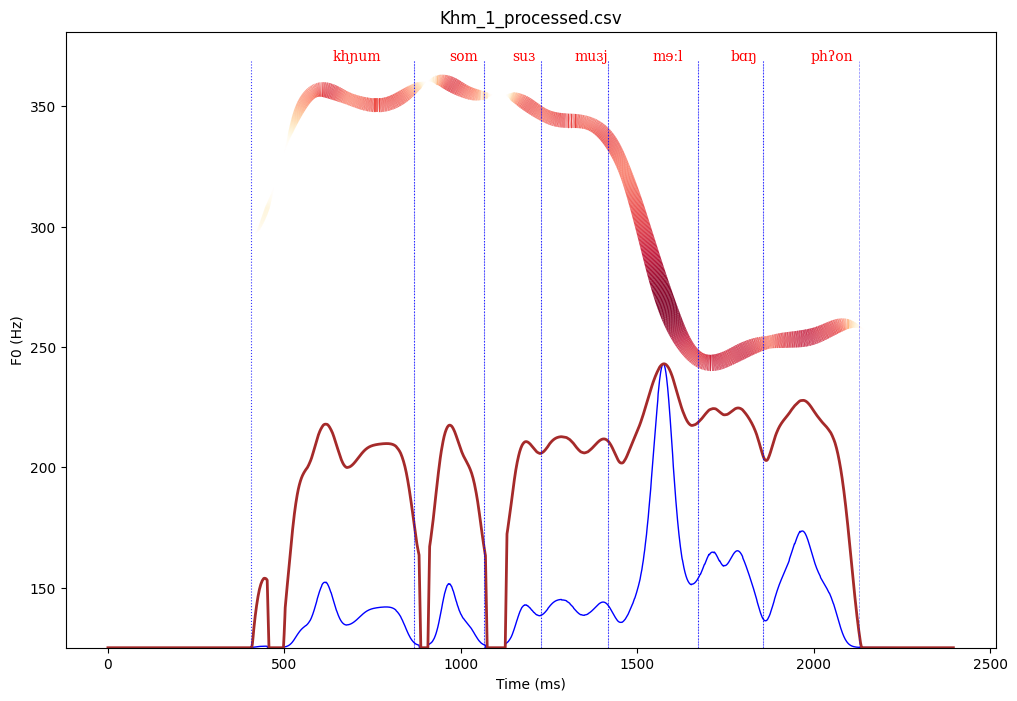

In [24]:
import os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.collections import LineCollection

yScale1 = ['speakerScale', 'tokenScale', 'dataScale']  # Choose the appropriate value here

class F0Plotter:
    def __init__(self, file_prefixes, data_path):
        self.file_prefixes = file_prefixes
        self.data_path = data_path
        self.dropdown = widgets.Dropdown(options=self.file_prefixes, description='Select Prefix:')
        self.dropdown.observe(self.plot_files, names='value')
        self.all_files = os.listdir(data_path)  # Update all_files attribute here

    def plot_files(self, change):
        print("Plotting new file...")  # Add this line for debugging
        selected_prefix = change['new']
        files_to_plot = [file for file in self.all_files if file.startswith(selected_prefix)]

        # Clear previous output and plot
        clear_output(wait=True)

        # Display the dropdown again after plotting
        display(self.dropdown)

        for sel_file in files_to_plot:
            file_path = os.path.join(self.data_path, sel_file)
            single_token1 = pd.read_csv(file_path)

            plotFloor1 = single_token1['plotFloorToken'].iloc[0] if yScale1 == 'tokenScale' else \
                 single_token1['plotFloorSpeaker'].iloc[0] if yScale1 == 'speakerScale' else \
                 single_token1['plotFloorData'].iloc[0]

            plotUnits1 = round(single_token1['f0_token_range'].iloc[0] / 30) if yScale1 == 'tokenScale' else \
                        round(single_token1['f0_speaker_range'].iloc[0] / 30) if yScale1 == 'speakerScale' else \
                        round(single_token1['f0_data_range'].iloc[0] / 30)

            f0range1 = single_token1['f0_token_range'].iloc[0] if yScale1 == 'tokenScale' else \
                      single_token1['f0_speaker_range'].iloc[0] if yScale1 == 'speakerScale' else \
                      single_token1['f0_data_range'].iloc[0]

            f0max1 = single_token1['f0_token_max'].iloc[0] if yScale1 == 'tokenScale' else \
                    single_token1['f0_speaker_max'].iloc[0] if yScale1 == 'speakerScale' else \
                    single_token1['f0_data_max'].iloc[0]

            periogram_single1 = plt.figure()

            # Your plotting code...
            fig = plt.figure(figsize=(12, 8))

            # Sample data (replace with your actual data)
            x = single_token1['t']
            y = single_token1['f0_interp_stretch_smooth']
            alphas = single_token1['smogPP_20Hz']

            # Calculate linewidths based on data range
            linewidths = alphas * 14

            #colors = plt.cm.Greys(linewidths)  # Using a colormap for colors, you can choose other colormaps too
            colors = plt.cm.YlOrRd(alphas)

            # Set color to gray (RGB value)
            segment_color = [0.1, 0.1, 0.1]  # RGB values for gray

            # Define a threshold for segmentation
            threshold =  0.00000000001 # Adjust this threshold value as needed

            # Split data into segments based on threshold
            segment_indices = np.where(alphas > threshold)[0]
            segments = np.split(segment_indices, np.where(np.diff(segment_indices) != 1)[0] + 1)

            # Create LineCollection for each segment
            for segment in segments:
                segment_x = x[segment]
                segment_y = y[segment]
                segment_linewidths = linewidths[segment]
                segment_alphas = alphas[segment]
                segment_colors = colors[segment]

                points = np.array([segment_x, segment_y]).T.reshape(-1, 1, 2)
                segment_segments = np.concatenate([points[:-1], points[1:]], axis=1)

                # Create LineCollection with specified color and add to plot
                lc = LineCollection(segment_segments, linewidth=segment_linewidths, alpha=segment_alphas, color=segment_colors)
                plt.gca().add_collection(lc)

            plt.plot(single_token1['t'], single_token1['postPP_rel'] * f0range1 + plotFloor1,
                    color="blue", alpha=1, linewidth=1, linestyle="solid")

            plt.plot(single_token1['t'], single_token1['smogPP_5Hz'] * f0range1 + plotFloor1,
                    color="brown", alpha=1, linewidth=2)

            if len(single_token1['syll_label']) > 0:
                plt.vlines(single_token1['syll_bounds'], ymin=plotFloor1, ymax=f0max1 + plotUnits1 * 2,
                          linestyles="dotted", colors="blue", linewidth=0.8, alpha=0.8)

                # Add dashed lines at the ends of syllable bounds
                for bound in single_token1['syll_end']:
                    plt.plot([bound, bound], [plotFloor1, f0max1 + plotUnits1 * 2], linestyle='--', color='blue', linewidth=0.5, alpha=0.5)

            # Existing code for syllable mid labels
            if len(single_token1['syll_mid']) > 0:
                for x, label in zip(single_token1['syll_mid'], single_token1['syll_label']):
                    if pd.notna(x) and pd.notna(label):  # Check for valid values
                        plt.text(x, f0max1 + plotUnits1 * 2, str(label), size=10, color="red", family="serif")

            plt.title(sel_file)  # Updated this line to use sel_file as the plot title
            plt.xlabel("Time (ms)")
            plt.ylabel("F0 (Hz)")
            plt.ylim(plotFloor1, f0max1 + plotUnits1 * 5)
            plt.show()


# Example usage:
data_file_path = "/content/Proper_project/PerEnergy_F0Curves/"

file_prefixes = ['AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Assuming your files are named using the prefixes in the specified directory
all_files = os.listdir(data_file_path)

f0_plotter = F0Plotter(file_prefixes, data_file_path)
f0_plotter.all_files = all_files
display(f0_plotter.dropdown)


Dropdown(description='Select Prefix:', index=3, options=('AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58'), value…

<Figure size 640x480 with 0 Axes>

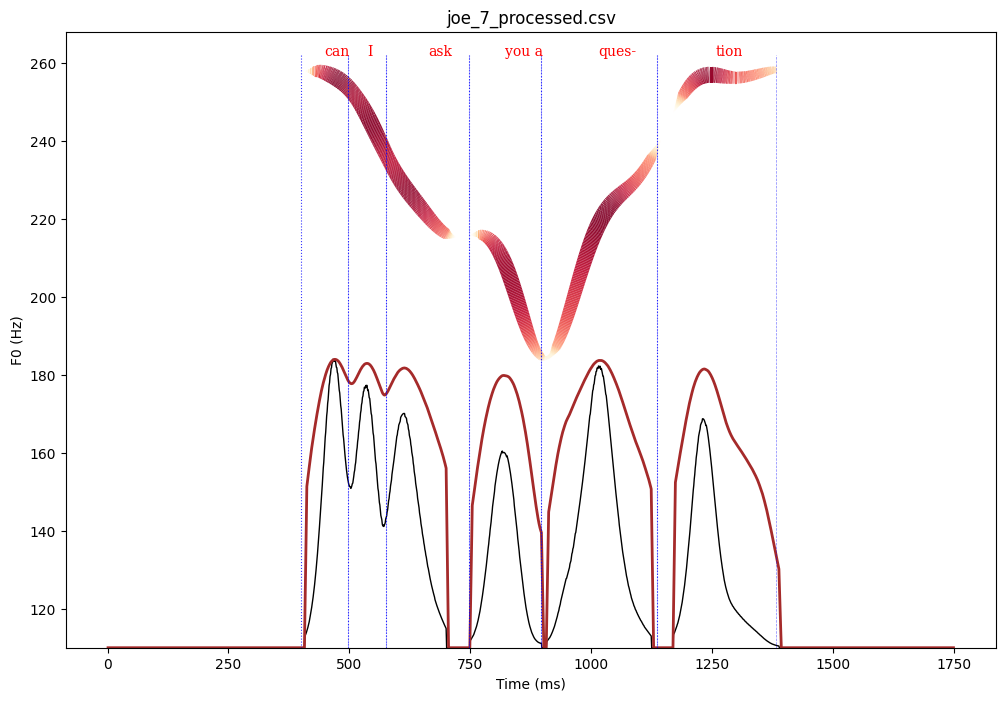

In [3]:
import os
from plot_periogram_f0 import F0Plotter

# Specify the file prefixes and data file path
data_file_path = "/content/Proper_project/PerEnergy_F0Curves/"
file_prefixes = ['AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Create an instance of F0Plotter
f0_plotter = F0Plotter(file_prefixes, data_file_path)

# Assuming you have the list of all files in the directory
all_files = os.listdir(data_file_path)
f0_plotter.all_files = all_files

# Display the dropdown widget to interact with
display(f0_plotter.dropdown)


Dropdown(description='Select Prefix:', options=('AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58'), value='AH_1')

/content/plot_periogram_noeffect.py:120: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


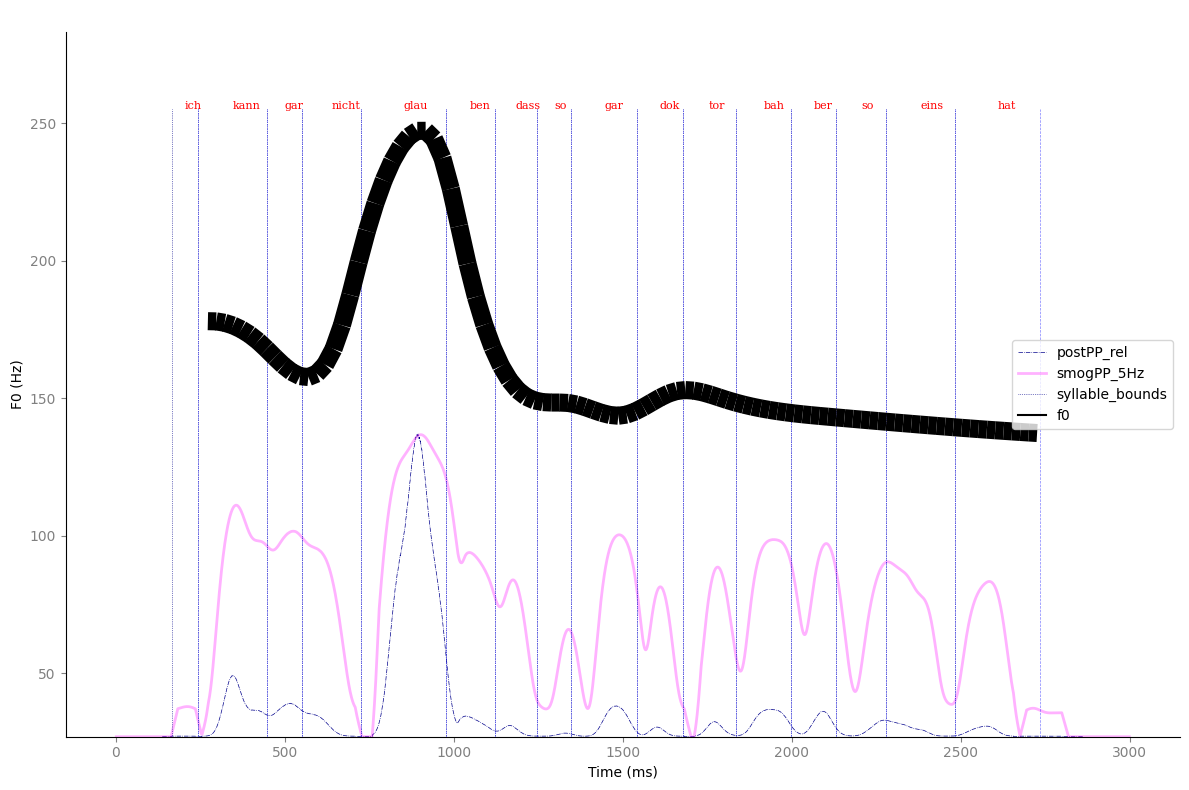

In [4]:
from plot_periogram_noeffect import F0_No_Effect_Plotter

# Define the file prefixes and data path
data_file_path = "/content/Proper_project/PerEnergy_F0Curves/"
file_prefixes = ['AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Instantiate F0_No_Effect_Plotter object
f0_plotter = F0_No_Effect_Plotter(file_prefixes, data_file_path)

# Display the dropdown to select the file prefix
display(f0_plotter.dropdown)


#Re-adjust selected tokens: change the perFloor value of specific tokens

# ***Re-adjust 3:***

In [5]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import os

class DataProcessor:
    def __init__(self, directory):
        self.directory = directory
        self.output_directory = os.path.join(directory, "Re_adjust")
        os.makedirs(self.output_directory, exist_ok=True)

    def butter_lowpass(self, cutoff, fs, order=5):
        nyquist = 0.5 * fs
        normal_cutoff = cutoff / nyquist
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def butter_lowpass_filter(self, data, cutoff, fs, order=5):
        b, a = self.butter_lowpass(cutoff, fs, order=order)
        y = filtfilt(b, a, data)
        return y

    def process_files(self, file_prefixes):
        fs = 1000  # Assuming the sampling frequency is 1000 Hz
        max_token_per_power = 0.01  # Replace with your actual value
        max_data_per_power = 0.01  # Replace with your actual value
        max_speaker_per_power = 0.01  # Replace with your actual value

        cutoff_frequencies = [20, 12, 8, 5]

        for prefix in file_prefixes:
            file_path = os.path.join(self.directory, f"{prefix}_processed.csv")
            if os.path.exists(file_path):
                main_df = pd.read_csv(file_path)

                files = main_df['file'].unique()
                if len(files) == 1:
                    main_df['perFloorStatus'] = np.where(
                        main_df['file'] == files[0], 0.004,
                        main_df['perFloorStatus']
                    )
                elif len(files) >= 2:
                    main_df['perFloorStatus'] = np.where(
                        main_df['file'] == files[0], 0.004,
                        np.where(main_df['file'] == files[1], 0.04, main_df['perFloorStatus'])
                    )
                    # Add more conditions for other unique file names if necessary

                main_df['perFloor_indeed'] = np.where(
                    main_df['relToStatus'] == 'token',
                    np.round(max_token_per_power * main_df['perFloorStatus'], 10),
                    np.where(
                        main_df['relToStatus'] == 'data',
                        np.round(max_data_per_power * main_df['perFloorStatus'], 10),
                        np.round(max_speaker_per_power * main_df['perFloorStatus'], 10)
                    )
                )

                main_df['logPP'] = 10 * np.log10(main_df['postPP'] / main_df['perFloor_indeed'])
                main_df['logPP'] = np.where((main_df['logPP'] < 0) | (main_df['logPP'].isna()), 0, main_df['logPP'])

                for cutoff in cutoff_frequencies:
                    column_name = f"smogPP_{cutoff}Hz"
                    filtered_column = self.butter_lowpass_filter(main_df['logPP'], cutoff, fs)
                    main_df[column_name] = np.where(filtered_column < 0, 0, np.round(filtered_column / max(filtered_column), 5))

                output_file_path = os.path.join(self.output_directory, f"{prefix}_adjusted.csv")
                main_df.to_csv(output_file_path, index=False)
                print(f"File {prefix}_adjusted.csv saved in Re_adjust folder.")
            else:
                print(f"File for prefix {prefix} not found.")

# Example usage:
directory_path = "/content/Proper_project/PerEnergy_F0Curves/"
file_prefixes = ['AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

processor = DataProcessor(directory_path)
processor.process_files(file_prefixes)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


File AH_1_adjusted.csv saved in Re_adjust folder.
File DM_1_adjusted.csv saved in Re_adjust folder.


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


File glenn_1_adjusted.csv saved in Re_adjust folder.
File joe_7_adjusted.csv saved in Re_adjust folder.
File misc_58_adjusted.csv saved in Re_adjust folder.
File Khm_1_adjusted.csv saved in Re_adjust folder.


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


#Replot DATA

Dropdown(description='Select Prefix:', index=4, options=('AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1…

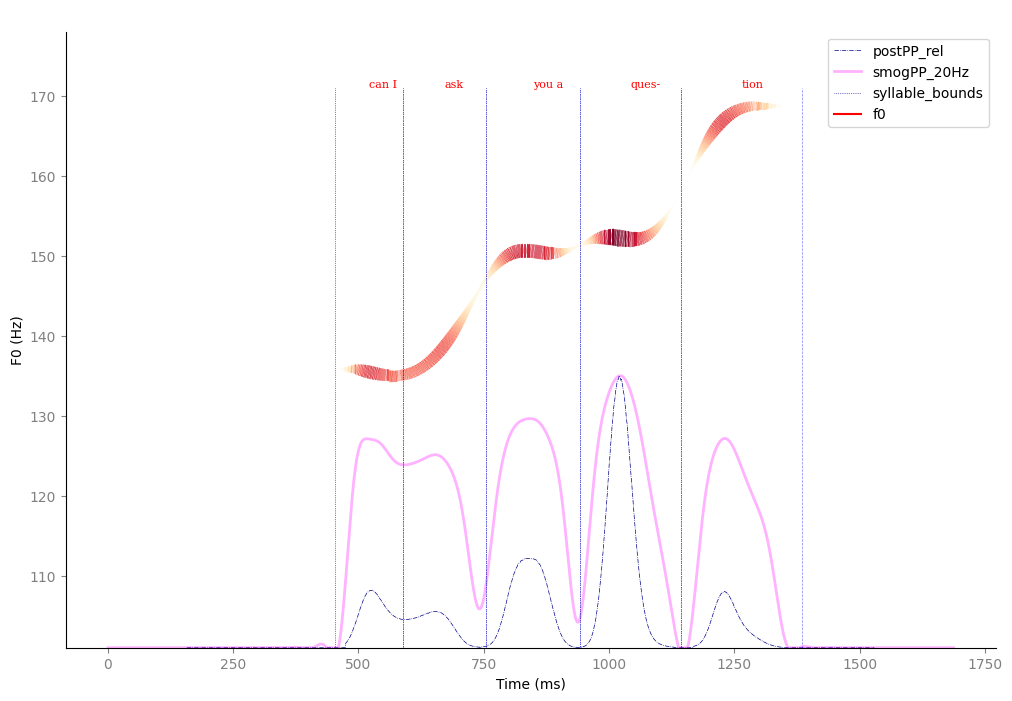

In [7]:
import os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.collections import LineCollection

y_scale1 = ['speakerScale', 'tokenScale', 'dataScale']  # Choose the appropriate value here

class F0Plotter:
    def __init__(self, file_prefixes, data_path):
        self.file_prefixes = file_prefixes
        self.data_path = data_path
        self.dropdown = widgets.Dropdown(options=self.file_prefixes, description='Select Prefix:')
        self.dropdown.observe(self.plot_files, names='value')
        self.all_files = os.listdir(data_path)  # Update all_files attribute here

    def plot_files(self, change):
        print("Plotting new file...")  # Add this line for debugging
        selected_prefix = change['new']
        files_to_plot = [file for file in self.all_files if file.startswith(selected_prefix)]

        # Clear previous output and plot
        clear_output(wait=True)

        # Display the dropdown again after plotting
        display(self.dropdown)

        for sel_file in files_to_plot:
            file_path = os.path.join(self.data_path, sel_file)

            single_token1 = pd.read_csv(file_path)

            plotFloor1 = single_token1['plotFloorToken'].iloc[0] if y_scale1 == 'tokenScale' else \
                        single_token1['plotFloorSpeaker'].iloc[0] if y_scale1 == 'speakerScale' else \
                        single_token1['plotFloorData'].iloc[0]

            plotUnits1 = round(single_token1['f0_token_range'].iloc[0] / 30) if y_scale1 == 'tokenScale' else \
                        round(single_token1['f0_speaker_range'].iloc[0] / 30) if y_scale1 == 'speakerScale' else \
                        round(single_token1['f0_data_range'].iloc[0] / 30)

            f0range1 = single_token1['f0_token_range'].iloc[0] if y_scale1 == 'tokenScale' else \
                      single_token1['f0_speaker_range'].iloc[0] if y_scale1 == 'speakerScale' else \
                      single_token1['f0_data_range'].iloc[0]

            f0max1 = single_token1['f0_token_max'].iloc[0] if y_scale1 == 'tokenScale' else \
                    single_token1['f0_speaker_max'].iloc[0] if y_scale1 == 'speakerScale' else \
                    single_token1['f0_data_max'].iloc[0]

            # Create the figure using Matplotlib
            plt.figure(figsize=(12, 8))

            # Extract scalar values for alpha and linewidth
            # Sample data (replace with your actual data)
            x = single_token1['t']
            y = single_token1['f0_interp_stretch_smooth']
            alphas = single_token1['smogPP_12Hz']

            # Calculate linewidths based on data range
            linewidths = alphas * 12

            colors = plt.cm.YlOrRd(alphas)  # Using a colormap for colors, you can choose other colormaps too

            # Set color to gray (RGB value)
            segment_color = [0.1, 0.1, 0.1]  # RGB values for gray

            # Define a threshold for segmentation
            threshold = 0.00000005  # Adjust this threshold value as needed

            # Split data into segments based on threshold
            segment_indices = np.where(alphas > threshold)[0]
            segments = np.split(segment_indices, np.where(np.diff(segment_indices) != 1)[0] + 1)

            # Create LineCollection for each segment
            for segment in segments:
                segment_x = x[segment]
                segment_y = y[segment]
                segment_linewidths = linewidths[segment]
                segment_alphas = alphas[segment]
                segment_colors = colors[segment]

                points = np.array([segment_x, segment_y]).T.reshape(-1, 1, 2)
                segment_segments = np.concatenate([points[:-1], points[1:]], axis=1)

                # Create LineCollection with specified color and add to plot
                lc = LineCollection(segment_segments, linewidth=segment_linewidths, alpha=segment_alphas, color=segment_colors)
                plt.gca().add_collection(lc)

            plt.plot(single_token1['t'], single_token1['postPP_rel'] * f0range1 + plotFloor1,
                    color="darkblue", alpha=1, linewidth=0.5, linestyle="-.", label='postPP_rel')

            plt.plot(single_token1['t'], single_token1['smogPP_20Hz'] * f0range1 + plotFloor1,
                    color="magenta", alpha=0.3, linewidth=2, label='smogPP_20Hz')

            # Add vlines for syllable boundaries
            if len(single_token1['syll_bounds']) > 0:
                plt.vlines(single_token1['syll_bounds'], ymin=plotFloor1, ymax=f0max1 + plotUnits1 * 2,
                          linestyles="dotted", colors="darkblue", linewidth=0.5, alpha=1, label='syllable_bounds')
                # Add dashed lines at the ends of syllable bounds
                for bound in single_token1['syll_end']:
                    plt.plot([bound, bound], [plotFloor1, f0max1 + plotUnits1 * 2], linestyle='--', color='blue',
                            linewidth=0.5, alpha=0.5)

            # Add text annotations for syllable labels
            if len(single_token1['syll_mid']) > 0:
                for x, label in zip(single_token1['syll_mid'], single_token1['syll_label']):
                    if pd.notna(x) and pd.notna(label):
                        plt.text(x, f0max1 + plotUnits1 * 2, str(label), size=8, color="red", family="serif")

            # Set plot title and labels
            plt.title(sel_file, color="white")
            plt.xlabel("Time (ms)")
            plt.ylabel("F0 (Hz)")
            plt.ylim(plotFloor1, f0max1 + plotUnits1 * 9)

            # Customize plot appearance
            plt.gca().set_facecolor("white")
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.gca().tick_params(axis='x', colors='gray')
            plt.gca().tick_params(axis='y', colors='gray')

            # Add legend with custom labels and colors
            plt.plot([], [], color="red", label="f0")  # Empty plot for f0 legend
            plt.legend()

            # Save the plot
            #plt.savefig(f"/{sel_file1}_perTest({perFloor})_{y_scale1}.pdf", format='pdf')

            # Display the plot
            plt.show()

# Example usage:
data_file_path = "/content/Proper_project/PerEnergy_F0Curves/Re_adjust"

file_prefixes = ['AH_1', 'DM_1', 'glenn_1', 'joe_7', 'misc_58', 'Khm_1']

# Assuming your files are named using the prefixes in the specified directory
all_files = os.listdir(data_file_path)

f0_plotter = F0Plotter(file_prefixes, data_file_path)
f0_plotter.all_files = all_files
display(f0_plotter.dropdown)


#Minimize the columns or Drop columns

In [ ]:
# Import necessary libraries
import pandas as pd

# Load main_df data
main_df = pd.read_csv('/content/Proper_project/PerEnergy_F0Curves/joe_7_processed.csv')

# Get rid of some variables
columns_to_drop = ['f0_smooth', 'intensity', 'strength_row1', 'f0_row1', 'strength_rowmax',
                   'total_power', 'periodic_power', 'max_data_per_power', 'max_data_strength',
                   'max_speaker_per_power', 'max_speaker_strength', 'max_token_per_power',
                   'max_token_strength', 'perFloor_indeed', 'strengThresh_indeed',
                   'periodic_fraction', 'postPP', 'logPP', 'f0_interp', 'f0_interp_stretch']
mini_main_df = main_df.drop(columns=columns_to_drop)

print("Columns removed successfully.")

print(mini_main_df.columns)

mini_main_df.to_csv("/content/drive/MyDrive/Proper_project/data_tables/mini_main_df.csv", index=False)

# ProPer analyses (IV): *Synchrony*, *∆F0*/*DeltaF0*, *Mass* and *Speech-rate*

Quantifying continuous prosody with periodic energy and F0 data to quantify prosodic strength (*Mass*), to describe pitch contours (using *Synchrony* within intervals and *∆F0*/*DeltaF0* between intervals) and to calculate local *Speech-rate*.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load data from CSV file
main_df = pd.read_csv("/content/drive/MyDrive/Proper_project/data_tables/mini_main_df.csv")
mini_data = main_df.drop_duplicates(subset=['file', 't'], keep='first')

# Check if manual syllable boundaries exist
manual = len(main_df['syll_bounds']) > 0
print(mini_data.columns)

# Detect boundaries



Additional Functions for loop(just for fun)

In [ ]:
import numpy as np
from functools import reduce
from itertools import chain

def andCond(cond, bVector):
    return np.logical_and(cond, bVector)

def condMap(cond, f, arguments, combf):
    for argument in arguments:
        cond = reduce(combf, map(lambda x: f(argument, x), cond))
    return cond

Lags = [1, 10, 20, 25, 30, 40, 50]

def mkBoundetect(single_token, useManual, autoMan):
    sss = single_token['smogPP_2ndDerDyn']

    def ssscmp(x):
        return sss > x

    def ssscmpf(f):
        def inner(x):
            return sss > f(sss, x)
        return inner

    if useManual:
        cond = np.ones_like(sss, dtype=bool)
        cond = andCond(cond, ssscmp(0.05))

        for lag in Lags:
            cond = condMap(cond, ssscmpf(np.roll), [lag], andCond)

        for lead_val in Lags:
            cond = condMap(cond, ssscmpf(np.roll), [-lead_val], andCond)

        cond = andCond(
            cond,
            np.logical_or(
                single_token['t'] < single_token['syll_boundsSeq'] + autoMan,
                single_token['t'] < np.roll(single_token['syll_boundsSeq'], -autoMan)
            )
        )

        result = np.where(cond)[0]
        return result

    else:
        cond = np.ones_like(sss, dtype=bool)
        cond = andCond(cond, ssscmp(0.05))

        for lag in Lags:
            cond = condMap(cond, ssscmpf(np.roll), [lag], andCond)

        for lead_val in Lags:
            cond = condMap(cond, ssscmpf(np.roll), [-lead_val], andCond)

        result = np.where(cond)[0]
        return result

def trySensitivity(ee, detection_sensitivity, expSyllNum):
    colnames = ee['single_token'].columns
    if len(ee['boundetect']) >= expSyllNum:
        return ee

    ee['single_token']['smogPP_2ndDerDyn'] = np.array([bwfilter(smogPP_2ndDer, 1000, detection_sensitivity, 2) for smogPP_2ndDer in ee['single_token']['smogPP_2ndDer']])
    ee['boundetect'] = mkBoundetect(ee['single_token'], useManual, autoMan)
    return ee


SECOND


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have loaded the necessary data into a DataFrame named 'main_df'

comp_df = main_df.copy()

useManual = True
autoMan = 40
averageSyll = 175

if useManual:
    comp_df['syll_boundsSeq'] = comp_df.groupby('file')['syll_bounds'].fillna(method='ffill')
    comp_df['syll_boundsSeq'] = comp_df['syll_boundsSeq'].fillna(0)

comp_df['useManualStatus'] = useManual
comp_df['autoManStatus'] = autoMan
comp_df['averageSyllStatus'] = averageSyll
comp_df['auto_bounds'] = np.nan
comp_df['DeltaF0'] = np.nan

for file, single_token in comp_df.groupby('file'):
    single_token['smogPP_1stDer'] = np.where(single_token['t'] == 0, 0,
                                             (single_token['smogPP_20Hz'] - single_token['smogPP_20Hz'].shift(1)) * 1000)
    single_token['smogPP_1stDer'] = single_token['smogPP_1stDer'].rolling(window=40, win_type='parzen').mean()
    single_token['smogPP_2ndDer'] = np.where(single_token['t'] == 0, 0,
                                             (single_token['smogPP_1stDer'] - single_token['smogPP_1stDer'].shift(1)) * 20)


    # Calculate the 2nd derivative of 'smogPP_2ndDer' with respect to 't'
    single_token['smogPP_2ndDerDyn'] = single_token['smogPP_2ndDer'].diff(periods=2) / single_token['t'].diff(periods=2)


    sss = single_token['smogPP_2ndDerDyn']
    Lags = [1, 10, 20, 25, 30, 40, 50]

    def mkBoundetect(single_token):
        def andCond(cond, bVector):
            return cond & bVector

        def condMap(cond, f, arguments, combf):
            for argument in arguments:
                cond = combf(cond, f(sss, argument))
            return cond

        ssscmp = lambda x: sss > x
        ssscmpf = lambda f: lambda x: sss > f(sss, x)

        cond = np.array(True)
        cond = andCond(ssscmp(0.05), cond)
        cond = condMap(cond, np.roll, Lags, np.logical_and)
        cond = condMap(cond, np.roll, Lags, np.logical_and)
        cond = andCond(
            (single_token['t'] < single_token['syll_boundsSeq'] + autoMan) |
            (single_token['t'] < single_token['syll_boundsSeq'].shift(-1, fill_value=0).fillna(0) + autoMan),
            cond
        )
        return np.where(cond)[0]
    #Boundaries Detection
    boundetect = mkBoundetect(single_token)
    single_token['boundetect'] = np.nan  # Create a new column with NaN values
    single_token.loc[boundetect, 'boundetect'] = boundetect  # Assign values based on boundetect

    single_token.loc[boundetect, 'auto_bounds'] = single_token['t'].iloc[boundetect]
 #previous
    #boundetect = mkBoundetect(single_token)
    #single_token.loc[boundetect, 'auto_bounds'] = single_token['t'].iloc[boundetect]


    # Save the DataFrame including 'smogPP_2ndDerDyn' column to CSV
    import os

    # Define the directory path
    directory_path = "/content/drive/MyDrive/Proper_project/data_tables/single_tokens"

    # Create the directory if it doesn't exist
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

    # Now you can save the file to the directory
    single_token.to_csv(os.path.join(directory_path, f"{file}_analysis.csv"), index=False)



# Rest of the code for reading and combining the single df files, and processing auto_bounds if useManual is True
# Read and combine the single df files
dir_singles = "/content/drive/MyDrive/Proper_project/data_tables/single_tokens/"
files = [f for f in os.listdir(dir_singles) if f.endswith(".csv")]

comp_df_comb = pd.concat([pd.read_csv(os.path.join(dir_singles, f)) for f in files], ignore_index=True)

# Delete temporary single_token files
#for f in files:
    #os.remove(os.path.join(dir_singles, f))

if useManual:
    comp_df['auto_boundsSeq'] = comp_df.groupby('file')['auto_bounds'].fillna(method='ffill')
    comp_df['auto_boundsSeq'] = comp_df['auto_boundsSeq'].fillna(0)
    comp_df['auto_bounds'] = np.where(
        (~comp_df['syll_bounds'].isna() &
         (comp_df['syll_bounds'] > comp_df['auto_boundsSeq'] + autoMan) &
         (comp_df['syll_bounds'] - autoMan < 0) &
         (comp_df['syll_bounds'] > comp_df['auto_boundsSeq'].shift(-1, fill_value=0).fillna(0) + autoMan) &
         (comp_df['syll_bounds'] + autoMan > comp_df['t'].max())),
        comp_df['syll_bounds'], comp_df['auto_bounds']
    )
    comp_df['auto_boundsSeq'] = comp_df.groupby('file')['auto_bounds'].fillna(method='ffill')
    comp_df['auto_boundsSeq'] = comp_df['auto_boundsSeq'].fillna(0)

boundetected = comp_df['auto_bounds'].dropna().index.tolist()
files = comp_df['file'].drop_duplicates().tolist()
print(comp_df.columns)
#print(boundetect)


#Read file (works)

In [ ]:
import os
import pandas as pd
from functools import reduce

dir_singles = "/content/drive/MyDrive/Proper_project/data_tables/single_tokens/"
files = [f for f in os.listdir(dir_singles) if f.endswith(".csv")]
comp_df_comb = pd.concat([pd.read_csv(os.path.join(dir_singles, f)) for f in files], ignore_index=True)
comp_df = comp_df_comb.copy()


# Delete temporary single_token files

#for f in files:
    #os.remove(os.path.join(dir_singles, f))

# Check if useManual is TRUE (adjust accordingly)
useManual = True

if useManual:
    autoMan = 1  # Assuming 'autoMan' is a constant, adjust accordingly

    # Group by 'file' and perform the required operations
def process_group(group):
    print("Group DataFrame before processing:")
    #print(group)

    group['auto_boundsSeq'] = 0  # Initialize auto_boundsSeq column with zeros

    auto_bounds = []
    for idx, row in group.iterrows():
        if (not pd.isna(row['syll_bounds'])) and (
            (row['syll_bounds'] > row['auto_boundsSeq'] + autoMan or
             row['syll_bounds'] - autoMan < 0) and
            (row['syll_bounds'] > auto_boundsSeq.shift(-autoMan).fillna(0).max() or
             row['syll_bounds'] + autoMan > group['t'].max())
        ):
            auto_bounds.append(row['syll_bounds'])
        else:
            auto_bounds.append(None)  # Replace None with the desired else value
        group['auto_bounds'] = auto_bounds
        group['auto_boundsSeq'] = auto_boundsSeq

    print("Group DataFrame after processing:")
    #print(group)

    return group


    grouped = comp_df.groupby('file').apply(process_group)
    comp_df = grouped.reset_index(drop=True)

# Create a list of detected boundaries
boundetect = comp_df[comp_df['auto_bounds'].notna()].index.tolist()

# Get the list of unique filenames
unique_files = comp_df['file'].drop_duplicates().tolist()


In [ ]:
# Save the modified DataFrame to a CSV file
output_file_path = "/content/drive/MyDrive/Proper_project/data_tables/comp_df.csv"
comp_df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")


DataFrame saved to /content/drive/MyDrive/Proper_project/data_tables/comp_df.csv


#plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Read data from CSV file
data_file = '/content/drive/MyDrive/Proper_project/data_tables/comp_df.csv'  # Update with your data file path
data = pd.read_csv(data_file)

# Define the function to create the plot
def create_single_plot(data, detect_sel_file, manual):
    auto_boundsPlot = data[data['file'] == detect_sel_file]

    plt.figure(figsize=(12, 8))

    # Fine-tune layout
    plt.subplots_adjust(left=0.08, right=0.92, top=1, bottom=0.08)  # Adjust the values as needed
    plt.plot(auto_boundsPlot['t'], auto_boundsPlot['smogPP_20Hz'] * 100, color='blue', alpha=0.9, linewidth=1.5, label='Periodic energy (smogPP_20Hz)')

    if manual:
        plt.vlines(auto_boundsPlot['syll_bounds'], ymin=0, ymax=100, linestyles='dotted', colors='darkred', linewidth=1, alpha=0.8)
        plt.vlines(auto_boundsPlot['syll_end'], ymin=0, ymax=100, linestyles='dotted', colors='darkred', linewidth=1, alpha=0.8)
    plt.hlines(0, xmin=auto_boundsPlot['t'].min(), xmax=auto_boundsPlot['t'].max(), colors='black', linewidth=0.8, alpha=1)

    #plt.vlines(auto_boundsPlot['auto_bounds'], ymin=0, ymax=100, colors='magenta', linewidth=0.5, alpha=0.5)

    plt.plot(auto_boundsPlot['t'], auto_boundsPlot['smogPP_1stDer'] * 0.5, color='red', alpha=0.5, linewidth=0.5, label='1st Derivative')
    plt.plot(auto_boundsPlot['t'], auto_boundsPlot['smogPP_2ndDer'] * 0.5, color='purple', alpha=0.5, linewidth=0.5, label='2nd Derivative')
    plt.plot(auto_boundsPlot['t'], auto_boundsPlot['smogPP_2ndDerDyn'] * 2, color='green', alpha=0.5, linewidth=0.5, label='Dynamic 2nd Derivative')

    if manual:
        if manual:
          for index, row in auto_boundsPlot.iterrows():
              if pd.notna(row['syll_mid']) and pd.notna(row['syll_label']):
                plt.text(row['syll_mid'], 110, str(row['syll_label']), size=10, color='black')

    #plt.title(f'Auto Bounds Plot for {detect_sel_file}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()#(loc='upper left', handles=[Line2D([], [], color='red', alpha=0.4, linewidth=1.5), Line2D([], [], color='black', alpha=0.4, linewidth=1), Line2D([], [], color='gold', alpha=0.8, linewidth=1), Line2D([], [], color='green', alpha=0.6, linewidth=1)])
    plt.grid(False)
    #plt.savefig(f'plots/{detect_sel_file}_autoBoundsPlot.pdf')
    plt.show()

# Iterate through files and create plots
files = data['file'].unique()
for detect_sel_file in files:
    create_single_plot(data, detect_sel_file, manual=True)  # Set manual to True for manual version


#Calculation

The following are a set of functions that are based on the boundary detection above (*boundary_detection* chunk) and computations within and across resulting intervals (in the following *run_fun* chunk). We measure the area under the periodic energy curve (*mass*), and the center of mass of the periodic energy curve (*CoM*). We calculate local *speech-rate* in terms of the temporal distance between consecutive CoMs, and we calcualte *∆F0*/*DeltaF0* as the F0 distance between consecutive CoMs. We also locate the center of gravity of F0 (*CoG*), and we calcualte *synchrony* as the distance between centers (CoG - CoM).

In [ ]:
import pandas as pd


# Read data from CSV file
comp_df = '/content/drive/MyDrive/Proper_project/data_tables/comp_df.csv'  # Update with your data file path
comp_df = pd.read_csv(comp_df)
print(comp_df.columns)


# Calculate COM and COG

In [ ]:
import pandas as pd
import numpy as np
from functools import partial

# Define intervals from detected boundaries
boundaries = np.append(comp_df['t'][boundetect], 0) #boundetect is token from previous function in Read file
l = len(boundaries)
filenames = np.append(comp_df['file'][boundetect], "")
intervals = pd.DataFrame({
    'file': filenames[1:l-1],
    'fileEnd': filenames[2:l],
    'start': boundaries[1:l-1],
    'end': boundaries[2:l]
})

intervals = intervals[intervals['file'] == intervals['fileEnd']]
intervals.drop(columns=['fileEnd'], inplace=True)


# Calculation functions (specific)
import numpy as np

def mass(df):
    x = round(np.nansum(df['smogPP_20Hz']), 3)
    return x

def interval_duration(df):
    x = np.sum(df['smogPP_20Hz'] > 0.01)
    return x

def center_of_mass(df):
    if np.nansum(df['smogPP_20Hz']) < 5:
        return 0
    else:
        x = round(np.nansum(df['smogPP_20Hz'] * df['t']) / np.nansum(df['smogPP_20Hz']), 3)
        return x

def center_of_gravity(df):
    f0_floor = min(df['f0_realFloorStretch'].min() - 0.1 * df['f0_speaker_range'].min(),
                   df['f0_realFloorStretch'].min() - 0.1 * 100)
    if np.nansum(df['smogPP_20Hz']) < 5:
        return 0
    x = round(
        np.nansum((df['f0_interp_stretch_smooth'] - f0_floor) * df['t'] * df['smogPP_20Hz']) /
        np.nansum((df['f0_interp_stretch_smooth'] - f0_floor) * df['smogPP_20Hz']), 3)
    return x


# Interval calculation function
def interval_kalk(df, interval, fn, field_name):
    selection = (
        (df['t'] >= interval['start']) &
        (df['t'] < interval['end']) &
        (df['file'] == interval['file'])
    )
    x = fn(df[selection])
    df.loc[selection, field_name] = x
    return x

# Mapping function (general)
def mark_map(df, func):
    indices = df.index.tolist()
    for w in indices:
        func(df.loc[w])
    return df

# Calculation functions (specific)
def mass(df):
    x = round(np.nansum(df['smogPP_20Hz']), 3)
    return x


def interval_duration(df):
    x = sum(df['smogPP_20Hz'] > 0.01)
    return x

def center_of_mass(df):
    if np.nansum(df['smogPP_20Hz']) < 5:
        return 0
    else:
        x = round(np.nansum(df['smogPP_20Hz'] * df['t']) / np.nansum(df['smogPP_20Hz']))
        return x


def center_of_gravity(df):
    f0_floor = min(df['f0_realFloorStretch'].min() - 0.1 * df['f0_speaker_range'].min(),
                   df['f0_realFloorStretch'].min() - 0.1 * 100)
    if np.nansum(df['smogPP_20Hz']) < 5:
        return 0
    x = round(
        np.nansum((df['f0_interp_stretch_smooth'] - f0_floor) * df['t'] * df['smogPP_20Hz']) /
        np.nansum((df['f0_interp_stretch_smooth'] - f0_floor) * df['smogPP_20Hz']), 3)
    return x
def f0_at_center_of_mass(df):
    matching_rows = df[df['t'] == round(df['CoM'])]
    if not matching_rows.empty:
        return matching_rows['f0_interp_stretch_smooth'].values[0]
    else:
        return 0  # or any default value you prefer
def f0_at_center_of_gravity(df):
    matching_rows = df[df['t'] == round(df['CoG'])]
    if not matching_rows.empty:
        return matching_rows['f0_interp_stretch_smooth'].values[0]
    else:
        return 0  # or any default value you prefer
def per_at_center_of_mass(df):
    matching_rows = df[df['t'] == round(df['CoM'])]
    if not matching_rows.empty:
        return matching_rows['smogPP_20Hz'].values[0]
    else:
        return 0  # or any default value you prefer

def per_at_center_of_gravity(df):
    matching_rows = df[df['t'] == round(df['CoG'])]
    if not matching_rows.empty:
        return matching_rows['smogPP_20Hz'].values[0]
    else:
        return 0  # or any default value you prefer

def synchrony(df):
    return round(df['CoG'] - df['CoM'], 3)

# Map specific functions to the new DataFrame
def apply_functions(row, df):
    interval_kalk(df, row, mass, 'mass')
    interval_kalk(df, row, interval_duration, 'intervalDuration')
    interval_kalk(df, row, center_of_mass, 'CoM')
    interval_kalk(df, row, center_of_gravity, 'CoG')
    interval_kalk(df, row, f0_at_center_of_mass, 'f0atCoM')
    interval_kalk(df, row, f0_at_center_of_gravity, 'f0atCoG')
    interval_kalk(df, row, per_at_center_of_mass, 'PERatCoM')
    interval_kalk(df, row, per_at_center_of_gravity, 'PERatCoG')
    interval_kalk(df, row, synchrony, 'synchrony')
    return row

# Create a new DataFrame to store the results
result_df = intervals.copy()

# Map specific functions to the new DataFrame
for index, row in result_df.iterrows():
    row = apply_functions(row, comp_df)

# Change '0's to 'NA's
comp_df['CoM'] = np.where(comp_df['CoM'] == 0, np.nan, comp_df['CoM'])
comp_df['CoG'] = np.where(comp_df['CoG'] == 0, np.nan, comp_df['CoG'])
comp_df['f0atCoM'] = np.where(comp_df['f0atCoM'] == 0, np.nan, comp_df['f0atCoM'])
comp_df['f0atCoG'] = np.where(comp_df['f0atCoG'] == 0, np.nan, comp_df['f0atCoG'])
comp_df['PERatCoM'] = np.where(comp_df['PERatCoM'] == 0, np.nan, comp_df['PERatCoM'])
comp_df['PERatCoG'] = np.where(comp_df['PERatCoG'] == 0, np.nan, comp_df['PERatCoG'])

# Compute ∆F0

f0atCoM_list = comp_df.loc[boundetect, 'f0atCoM']
realFluct_i = np.where(~np.isnan(f0atCoM_list))[0]
relevantFluct_i = realFluct_i[1:]
DeltaListF0 = np.diff(f0atCoM_list.iloc[realFluct_i])
DeltaF0List = f0atCoM_list.copy()
DeltaF0List.iloc[relevantFluct_i] = DeltaListF0
comp_df.loc[boundetect, 'DeltaF0'] = DeltaF0List



# Add, clean, and scale parameters
from itertools import groupby

# Ignore weak intervals
comp_df['CoM_corr'] = np.where(
    (comp_df['CoM'] != comp_df['CoM'].shift()) |
    ((~comp_df['CoM'].isna()) & (comp_df['CoM'].shift().isna())),
    comp_df['CoM'],
    np.nan
)
comp_df['CoG_corr'] = np.where(
    (comp_df['CoG'] != comp_df['CoG'].shift()) |
    ((~comp_df['CoG'].isna()) & (comp_df['CoG'].shift().isna())),
    comp_df['CoG'],
    np.nan
)

# Put CoM values in their time's row
comp_df['CoMatCoM'] = np.where(comp_df['CoM'] == comp_df['t'], comp_df['CoM'], np.nan)

# '∆F0': Add token-initial values (relative to speaker's median F0)

# Calculate the speaker's median F0 value
f0_speaker_median = comp_df['f0_interp_stretch_smooth'].median()

# Calculate '∆F0' using the defined speaker's median F0
min_CoM = np.min(np.where(~np.isnan(comp_df['CoM'])))
comp_df['DeltaF0'] = np.where(
    (min_CoM == comp_df['t'] + 1),
    comp_df['f0atCoM'] - f0_speaker_median,
    np.where(
        (~comp_df['auto_bounds'].isna() & ~comp_df['f0atCoM'].isna()),
        comp_df['DeltaF0'],
        np.nan
    )
)


# '∆F0': Stretch observations
comp_df['DeltaF0'] = np.where(
    ~comp_df['mass'].isna(),
    comp_df['DeltaF0'].fillna(method='ffill'),
    np.nan
)


# Calculate the range of the speaker's F0 values
f0_speaker_range = comp_df['f0_interp_stretch_smooth'].max() - comp_df['f0_interp_stretch_smooth'].min()

# Normalize parameters
comp_df['DeltaF0_rel'] = round((comp_df['DeltaF0'] / f0_speaker_range) * 100, 3)
comp_df['sync_rel'] = round((comp_df['synchrony'] / comp_df['intervalDuration']) * 100, 3)
comp_df['mass_rel'] = round(comp_df['mass'] / (comp_df['smogPP_20Hz'].sum() / len(comp_df['CoM_corr'].dropna().unique())), 3)
comp_df['intervalDuration_rel'] = np.where(
    ~comp_df['intervalDuration'].isna(),
    round(comp_df['intervalDuration'] / comp_df['intervalDuration'].max(), 3),
    np.nan
)

# Create plot-friendly data
comp_df['DeltaF0Label'] = np.where(
    round(comp_df['DeltaF0']) > 0,
    '+' + round(comp_df['DeltaF0']).astype(str) + 'Hz (' + round(abs(comp_df['DeltaF0_rel'])).astype(str) + '%)',
    round(comp_df['DeltaF0']).astype(str) + 'Hz (' + round(abs(comp_df['DeltaF0_rel'])).astype(str) + '%)'
)
comp_df['syncLabel'] = np.where(
    round(comp_df['synchrony']) > 0,
    '+' + round(comp_df['synchrony']).astype(str) + ' ms (' + round(abs(comp_df['sync_rel'])).astype(str) + '%)',
    round(comp_df['synchrony']).astype(str) + ' ms (' + round(abs(comp_df['sync_rel'])).astype(str) + '%)'
)


In [ ]:
print(comp_df.columns)

speech-rate

In [ ]:
from scipy.signal import butter, filtfilt
from scipy.interpolate import interp1d
from scipy.interpolate import interp1d

# Stretch observations
comp_df['CoM_seq'] = comp_df['CoM_corr'].fillna(method='ffill')

# Calculate consecutive CoM diffs
comp_df['CoM_diff'] = np.where(
    ~comp_df['CoM_corr'].isna(),
    comp_df['CoM_corr'] - comp_df['CoM_seq'].shift(2),
    np.nan
)

# Normalize CoM_diff (0--1)
comp_df['CoM_diff_rel'] = np.where(
    ~comp_df['CoM_corr'].isna(),
    round(comp_df['CoM_diff'] / max(comp_df['CoM_diff'].dropna()), 3),
    np.nan
)

# Add token-initial value (relative to interval durationss in the tokens)
comp_df['CoM_diff_rel'] = np.where(
    comp_df['t'] == comp_df['CoM_corr'].min(),
    comp_df['intervalDuration_rel'],
    comp_df['CoM_diff_rel']
)

# Stretch observations to keep values @ CoM
comp_df['CoM_diff_rel'] = comp_df['CoM_diff_rel'].fillna(method='ffill')
comp_df['CoM_diff_rel'] = np.where(
    (comp_df['t'] == comp_df['CoM_corr']) & ~comp_df['CoM_corr'].isna(),
    comp_df['CoM_diff_rel'],
    np.nan
)

# Invert values (1--0)
comp_df['CoM_diff_relInv'] = np.where(
    ~comp_df['CoM_diff_rel'].isna(),
    (comp_df['CoM_diff_rel'] * -1) + 1,
    np.nan
)

valid_indices = ~np.isnan(comp_df['CoM_diff_relInv'])

if valid_indices.any():
    valid_t = comp_df['t'][valid_indices]
    valid_CoM_diff_relInv = comp_df['CoM_diff_relInv'][valid_indices]

    interp_func = interp1d(valid_t, valid_CoM_diff_relInv, kind='linear', fill_value='extrapolate')
    comp_df['CoM_diff_relInterp'] = interp_func(comp_df['t'])
else:
    comp_df['CoM_diff_relInterp'] = np.nan

# Drop NaN values from CoM_diff_relInv
valid_indices = ~np.isnan(comp_df['CoM_diff_relInv'])
valid_t = comp_df['t'][valid_indices]
valid_CoM_diff_relInv = comp_df['CoM_diff_relInv'][valid_indices]

# Stretch observations before smoothing
CoM_diff_relInterpStretch = comp_df['CoM_diff_relInterp'].copy()

if np.isnan(CoM_diff_relInterpStretch).all():
    first_non_na = 0
    last_non_na = 0
else:
    first_non_na = np.min(np.where(~np.isnan(CoM_diff_relInterpStretch))[0])
    last_non_na = np.max(np.where(~np.isnan(CoM_diff_relInterpStretch))[0])

CoM_diff_relInterpStretch[:first_non_na] = CoM_diff_relInterpStretch[first_non_na]
CoM_diff_relInterpStretch[last_non_na:] = CoM_diff_relInterpStretch[last_non_na]

if len(valid_t) > 0:
    comp_df['CoM_diff_relInterpStretch'] = np.where(
        (np.isnan(CoM_diff_relInterpStretch) & (comp_df['t'] < valid_t.iloc[0])),
        valid_CoM_diff_relInv.iloc[0],
        np.where(
            (np.isnan(CoM_diff_relInterpStretch) & (comp_df['t'] >= valid_t.iloc[-1])),
            valid_CoM_diff_relInv.iloc[-1],
            CoM_diff_relInterpStretch
        )
    )
else:
    comp_df['CoM_diff_relInterpStretch'] = CoM_diff_relInterpStretch

# Smooth and unstretch
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

fs = 1000  # Sampling frequency in Hz
cutoff = 2  # Cutoff frequency in Hz
comp_df['CoM_diff_relSmoothInterp'] = butter_lowpass_filter(CoM_diff_relInterpStretch, cutoff, fs)

# Calculate local speech rate
comp_df['localSpeechRate'] = np.where(
    ~comp_df['CoM_diff_relInterp'].isna(),
    round(comp_df['CoM_diff_relSmoothInterp'], 4),
    np.nan
)


# Interpolate labels from the TextGrid manual annotations
if len(comp_df['syll_mid']) > 0:
    comp_df['syll_label'] = comp_df['syll_label'].fillna(method='ffill')

if len(comp_df['word_label']) > 0:
    comp_df['word_label'] = comp_df['word_label'].fillna(method='ffill')

# Interpolate syllable labels
if len(comp_df['syll_mid']) > 0:
    comp_df['syll_label'] = comp_df.groupby('file', group_keys=False)['syll_label'].apply(
    lambda x: x.ffill() if x.notna().any() else x
    )

# Interpolate word labels
if len(comp_df['word_label']) > 0:
    comp_df['word_label'] = comp_df.groupby('file', group_keys=False)['word_label'].apply(
    lambda x: x.ffill() if x.notna().any() else x
    )



In [ ]:
print(comp_df.columns)

In [ ]:
# Save the modified DataFrame to a CSV file
output_file_path = "/content/drive/MyDrive/Proper_project/data_tables/comp_CoM_CoG_df.csv"
comp_df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to /content/drive/MyDrive/Proper_project/data_tables/comp_CoM_CoG_df.csv


#Plot periograms with computations overlaid

In [ ]:
import pandas as pd

# Define a list of file names
comp_df = pd.read_csv("/content/drive/MyDrive/Proper_project/data_tables/comp_CoM_CoG_df.csv")
files = comp_df['file'].unique()
print(comp_df.columns)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Import the numpy module
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.collections import LineCollection

yScale = ['tokenScale', 'speakerScale']


# Loop through files (assuming 'files' is a list of filenames)
for sel_file in files:
    single_token = comp_df[comp_df['file'] == sel_file]

    plotFloor = single_token['plotFloorToken'].iloc[0] if yScale == 'tokenScale' else \
                single_token['plotFloorSpeaker'].iloc[0] if yScale == 'speakerScale' else \
                single_token['plotFloorData'].iloc[0]

    plotUnits = round(single_token['f0_token_range'].iloc[0] / 30) if yScale == 'tokenScale' else \
                round(single_token['f0_speaker_range'].iloc[0] / 30) if yScale == 'speakerScale' else \
                round(single_token['f0_data_range'].iloc[0] / 30)

    f0range = single_token['f0_token_range'].iloc[0] if yScale == 'tokenScale' else \
                single_token['f0_speaker_range'].iloc[0] if yScale == 'speakerScale' else \
                single_token['f0_data_range'].iloc[0]

    f0max = single_token['f0_token_max'].iloc[0] if yScale == 'tokenScale' else \
            single_token['f0_speaker_max'].iloc[0] if yScale == 'speakerScale' else \
            single_token['f0_data_max'].iloc[0]

    midLow = round(single_token['f0_token_min'].iloc[0] - single_token['f0_token_range'].iloc[0] / 2) \
             if yScale == 'tokenScale' else \
             round(single_token['f0_speaker_min'].iloc[0] - single_token['f0_speaker_range'].iloc[0] / 2) \
             if yScale == 'speakerScale' else \
             round(single_token['f0_data_min'].iloc[0] - single_token['f0_data_range'].iloc[0] / 2)

    midHigh = round(single_token['f0_token_max'].iloc[0] - single_token['f0_token_range'].iloc[0] / 2) \
              if yScale == 'tokenScale' else \
              round(single_token['f0_speaker_max'].iloc[0] - single_token['f0_speaker_range'].iloc[0] / 2) \
              if yScale == 'speakerScale' else \
              round(single_token['f0_data_max'].iloc[0] - single_token['f0_data_range'].iloc[0] / 2)

    # Calculate max and min bounds based on 'manual' condition
    manual = True  # Assuming manual is a variable defined elsewhere

    if manual:
        maxBounds = single_token[['auto_bounds', 'syll_bounds']].max().max()
        minBounds = single_token[['auto_bounds', 'syll_bounds']].min().min()
    else:
        maxBounds = single_token['auto_bounds'].max()
        minBounds = single_token['auto_bounds'].min()


    # Create the plot
    plt.figure(figsize=(14, 8))

    # Create the LineCollection plot
    #plt.plot(single_token['t'], single_token['f0_interp_stretch_smooth'], color='blue', alpha=1, linewidth=3.5)

    # Creating the LineCollection plot
    cmap = LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 0)])
    x = single_token['t']
    y = single_token['f0_interp_stretch_smooth']
    alphas = single_token['smogPP_20Hz']
    # Define a range of linewidths based on data range
    linewidths = alphas * 12

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, linewidth=linewidths, alpha=alphas, label='f0_interp_stretch_smooth')
    lc.set_array(x)
    plt.gca().add_collection(lc)

    #Other plots
    plt.plot(single_token['t'], single_token['smogPP_20Hz'] * f0range + plotFloor,
            color='red', alpha=1, linewidth=2)

    plt.plot(single_token['t'], single_token['localSpeechRate'] * f0range + plotFloor,
            color='green', alpha=1, linewidth=2.5, linestyle='solid')

    #Boundaries
    if manual:
        plt.vlines(single_token['syll_bounds'], ymin=plotFloor, ymax=f0max + plotUnits * 9, linestyles='dotted', colors='black', linewidth=1, alpha=1)
        plt.vlines(single_token['syll_end'], ymin=plotFloor, ymax=f0max + plotUnits * 9, linestyles='dotted', colors='black', linewidth=1, alpha=1)
        #plt.vlines(single_token['auto_bounds'], ymin=plotFloor, ymax=f0max + plotUnits * 9, colors='green', linewidth=0.3, alpha=1)
        plt.vlines(single_token['CoM_corr'], ymin=plotFloor, ymax=single_token['PERatCoM'] * f0range + plotFloor, colors='red', linewidth=1, alpha=1, linestyle='dashed')

        #landmarks
        plt.vlines(single_token['CoM_corr'], ymin=single_token['f0atCoM'] - plotUnits * 6, ymax=single_token['f0atCoM'] + plotUnits * 3, colors='red', linewidth=1, alpha=0.9, linestyle='dashed')
        plt.vlines(single_token['CoG_corr'], ymin=single_token['f0atCoG'] - plotUnits * 6, ymax=single_token['f0atCoG'] + plotUnits * 3, colors='blue', linewidth=1, alpha=0.9, linestyle='solid')

    # Adjust the code accordingly
    for i in range(len(single_token)):
        synchrony_value = single_token['synchrony'].iloc[i]
        if not pd.isna(synchrony_value):
            rounded_synchrony = round(synchrony_value) / 2
        else:
            rounded_synchrony = 0  # Default value for NaN

        if pd.notna(single_token['f0atCoG'].iloc[i]) and pd.notna(single_token['CoM_corr'].iloc[i]):
            plt.text(single_token['CoM_corr'].iloc[i] + rounded_synchrony, single_token['f0atCoG'].iloc[i] - plotUnits * 8, single_token['syncLabel'].iloc[i], color='green', size=8, family='serif')
        if pd.notna(single_token['CoM'].iloc[i]):
            plt.text(single_token['CoM'].iloc[i], plotFloor - plotUnits, single_token['mass_rel'].iloc[i], color='blue', size=8, family='serif')

        if manual:
            syll_mid = single_token['syll_mid'].iloc[i]
            f0max = single_token['f0_token_max'].iloc[i]
            syll_label = single_token['syll_label'].iloc[i]


            # Check if syll_mid and f0max are finite and valid
            if not (np.isfinite(syll_mid) and np.isfinite(f0max)):
                # Handle invalid values here, like skipping the iteration or using defaults
                continue  # Skip this iteration if values are not valid

            plt.text(syll_mid, f0max + plotUnits * 8, syll_label, color='black', size=9, family='serif')

    #Legends
    # CoGs
    plt.plot([minBounds - 20, minBounds - 20], [midHigh - plotUnits * 3, midHigh + plotUnits * 3], color="blue", linewidth=1, alpha=0.8)
    plt.text(minBounds - 30, midHigh, "CoG", color="blue", alpha=1, size=8, family="serif", ha="right")

    # CoMs
    plt.plot([minBounds - 20, minBounds - 20], [midLow + plotUnits * 3, midLow - plotUnits * 3], color="red", linewidth=1, alpha=0.8, linestyle='--')
    plt.text(minBounds - 30, midLow, "CoM", color="red", alpha=1, size=8, family="serif", ha="right")

    # ∆F0 / F0 @ CoM
    plt.text(maxBounds + 10, midHigh + plotUnits * 4, "∆F0", color="blue", alpha=1, size=8, family="serif", ha="left")
    plt.text(maxBounds + 10, midHigh + plotUnits * 2, "low < 0 < high", color="blue", alpha=1, size=8, family="serif", ha="left")

    # Synchrony
    plt.text(maxBounds + 10, midHigh - plotUnits * 2, "Synchrony", color="red", size=5, family="serif", ha="left")
    plt.text(maxBounds + 10, midHigh - plotUnits * 4, "fall < 0 < rise", color="darkblue", size=8, family="serif", ha="left")

    # Mass
    plt.text(maxBounds + 10, midLow + plotUnits, "Mass", color="red", size=8, family="serif", ha="left")
    plt.text(maxBounds + 10, midLow - plotUnits, "weak < 1 < strong", color="red", size=8, family="serif", ha="left")



    # Other plot settings
    plt.xlim(minBounds - 100, single_token['t'].max())
    plt.ylim(plotFloor - plotUnits, f0max + plotUnits * 12)
    plt.xlabel('F0')  # Add your x-axis label here
    plt.ylabel('Times(s)')  # Add your y-axis label here
    plt.title('Plot periograms with computations overlaid')  # Add your plot title here
    plt.grid(False)
    #plt.savefig(f'plots/{sel_file}_PERIOGRAM+({yScale}).pdf', format='pdf')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import UnivariateSpline

# Assuming you've already defined and loaded your single_token DataFrame

# Create the plot
plt.figure(figsize=(13, 8))


# Extract time series and f0 values from the data
time_series = data['t'].values
f0_values = data['f0_interp_smooth'].values

# Remove NaN and Inf values from f0_values
valid_indices = np.logical_and(np.isfinite(f0_values), ~np.isnan(f0_values))
time_series = time_series[valid_indices]
f0_values = f0_values[valid_indices]

# Create LineCollection for the colored line
cmap = LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 1)])

# Use smoothing spline for well-connected and smooth curve
smooth_time = np.linspace(time_series.min(), time_series.max(), num=200)  # Fewer points for smoother curve
spl = UnivariateSpline(time_series, f0_values, s=1000)  # Adjust smoothing parameter 's' for smoothness
smooth_f0_values = spl(smooth_time)

# Calculate line widths based on f0 values
min_line_width = 13
max_line_width = 13
normalized_f0 = (f0_values - f0_values.min()) / (f0_values.max() - f0_values.min())
line_widths = min_line_width + normalized_f0 * (max_line_width - min_line_width)

points = np.array([smooth_time, smooth_f0_values]).T
segments = np.array([points[:-1], points[1:]]).transpose(1, 0, 2)
lc = LineCollection(segments, cmap=cmap, linewidth=line_widths)
lc.set_array(smooth_time)

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(13, 8))

# Add the LineCollection to the axis
ax.add_collection(lc)
ax.autoscale()

ax.set_xlim(time_series.min(), time_series.max())  # Adjust x-axis range as needed
ax.set_ylim(f0_values.min(), f0_values.max())  # Adjust y-axis range as needed
ax.set_xlabel('Time')
ax.set_ylabel('f0')
ax.set_title('Well-Connected and Smooth Colored Line Plot of f0 vs. Time')


#plt.plot(single_token['t'], single_token['f0_interp_stretch_smooth'],
         #color='blue', alpha=single_token['smogPP_20Hz'].iloc[0] * 3.5)
plt.plot(single_token['t'], single_token['smogPP_20Hz'] * f0range + plotFloor,
         color='red', alpha=0.9, linewidth=1)
plt.plot(single_token['t'], single_token['localSpeechRate'] * f0range + plotFloor,
         color='green', alpha=0.9, linewidth=2.5, linestyle='solid')

if manual:
    plt.vlines(single_token['syll_bounds'], ymin=plotFloor, ymax=f0max + plotUnits * 9, linestyles='dotted', colors='black', linewidth=1, alpha=0.7)
    plt.vlines(single_token['syll_end'], ymin=plotFloor, ymax=f0max + plotUnits * 9, linestyles='dotted', colors='black', linewidth=1, alpha=0.7)
    plt.vlines(single_token['auto_bounds'], ymin=plotFloor, ymax=f0max + plotUnits * 9, colors='red', linewidth=0.02, alpha=0.5)
    plt.vlines(single_token['CoM_corr'], ymin=plotFloor, ymax=single_token['PERatCoM'] * f0range + plotFloor, colors='red', linewidth=1, alpha=0.8, linestyle='dashed')

    plt.vlines(single_token['CoM_corr'], ymin=single_token['f0atCoM'] - plotUnits * 3, ymax=single_token['f0atCoM'] + plotUnits * 3, colors='red', linewidth=1, alpha=0.9, linestyle='dashed')
    plt.vlines(single_token['CoG_corr'], ymin=single_token['f0atCoG'] - plotUnits * 3, ymax=single_token['f0atCoG'] + plotUnits * 3, colors='blue', linewidth=1, alpha=0.9, linestyle='solid')


# Annotations
for i in range(len(single_token)):
    synchrony_value = single_token['synchrony'].iloc[i]
    if not pd.isna(synchrony_value):
        rounded_synchrony = round(synchrony_value) / 2
    else:
        rounded_synchrony = 0  # Default value for NaN

    if pd.notna(single_token['f0atCoG'].iloc[i]) and pd.notna(single_token['CoM_corr'].iloc[i]):
        plt.text(single_token['CoM_corr'].iloc[i] + rounded_synchrony, single_token['f0atCoG'].iloc[i] - plotUnits * 4, single_token['syncLabel'].iloc[i], color='green', size=8, family='serif')
    if pd.notna(single_token['CoM'].iloc[i]):
        plt.text(single_token['CoM'].iloc[i], plotFloor - plotUnits, single_token['mass_rel'].iloc[i], color='blue', size=8, family='serif')
    if manual:
            syll_mid = single_token['syll_mid'].iloc[i]
            f0max = single_token['f0_token_max'].iloc[i]
            syll_label = single_token['syll_label'].iloc[i]
            syll_end = single_token['syll_end'].iloc[i]  # Extracting syllable end

            # Check if syll_mid and f0max are finite and valid
            if not (np.isfinite(syll_mid) and np.isfinite(f0max)):
                # Handle invalid values here, like skipping the iteration or using defaults
                continue  # Skip this iteration if values are not valid

            plt.text(syll_mid, f0max + plotUnits * 8, syll_label, color='black', size=9, family='serif')

# CoGs
plt.plot([minBounds - 20, minBounds - 20], [midHigh - plotUnits * 3, midHigh + plotUnits * 3], color="blue", linewidth=1, alpha=0.8)
plt.text(minBounds - 30, midHigh, "CoG", color="blue", alpha=1, size=8, family="serif", ha="right")

# CoMs
plt.plot([minBounds - 20, minBounds - 20], [midLow + plotUnits * 3, midLow - plotUnits * 3], color="red", linewidth=1, alpha=0.8, linestyle='--')
plt.text(minBounds - 30, midLow, "CoM", color="red", alpha=1, size=8, family="serif", ha="right")

# ∆F0 / F0 @ CoM
plt.text(maxBounds + 10, midHigh + plotUnits * 4, "∆F0", color="blue", alpha=1, size=8, family="serif", ha="left")
plt.text(maxBounds + 10, midHigh + plotUnits * 2, "low < 0 < high", color="blue", alpha=1, size=8, family="serif", ha="left")

# Synchrony
plt.text(maxBounds + 10, midHigh - plotUnits * 2, "Synchrony", color="green", size=8, family="serif", ha="left")
plt.text(maxBounds + 10, midHigh - plotUnits * 4, "fall < 0 < rise", color="darkblue", size=8, family="serif", ha="left")

# Mass
plt.text(maxBounds + 10, midLow + plotUnits, "Mass", color="red", size=8, family="serif", ha="left")
plt.text(maxBounds + 10, midLow - plotUnits, "weak < 1 < strong", color="red", size=8, family="serif", ha="left")



# Other plot settings
plt.xlim(minBounds - 100, single_token['t'].max())
plt.ylim(plotFloor - plotUnits, f0max + plotUnits * 12)
plt.xlabel('Times')  # Add your x-axis label here
plt.ylabel('F0')  # Add your y-axis label here
plt.title('Plot periograms with computations overlaid')  # Add your plot title here
plt.grid(False)

# Save the plot to a PDF file
#plt.savefig(f"plots/{sel_file}_PERIOGRAM+({yScale}).pdf", format='pdf')

# Show the plot
plt.show()


# ***`Best Plot for all this projecks.:`***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from scipy.interpolate import CubicSpline

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Proper_project/data_tables/comp_CoM_CoG_df.csv')

# Extract time series and f0 values from the data
time_series = data['t'].values
f0_values = data['f0_interp_smooth'].values

# Remove NaN and Inf values from f0_values
valid_indices = np.logical_and(np.isfinite(f0_values), ~np.isnan(f0_values))
time_series = time_series[valid_indices]
f0_values = f0_values[valid_indices]

# Create LineCollection for the colored line
cmap = LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 1)])

# Use cubic spline interpolation for very smooth curve
smooth_time = np.linspace(time_series.min(), time_series.max(), num=3000)  # More points for smoother curve
cs = CubicSpline(time_series, f0_values)
smooth_f0_values = cs(smooth_time)

points = np.array([smooth_time, smooth_f0_values]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, linewidth=10)
lc.set_array(smooth_time)

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Add the LineCollection to the axis
ax.add_collection(lc)
ax.autoscale()

ax.set_xlim(time_series.min(), time_series.max())
ax.set_xlabel('Time')
ax.set_ylabel('f0')
ax.set_title('Very Smooth Colored Line Plot of f0 vs. Time')

# Add colorbar
sc = plt.scatter([], [], c=[], cmap='jet')
plt.colorbar(sc, label='Color')

plt.show()


#Minimize comp_df table

In [ ]:
import pandas as pd

# Assuming comp_df is your original DataFrame
mini_comp_df = comp_df.drop(columns=['plotFloorToken', 'plotFloorSpeaker', 'plotFloorData', 'intensityRel',
                                     'total_powerRel', 'postPP_rel', 'logPP_rel', 'smogPP_1stDer',
                                     'smogPP_2ndDer',  'CoM_seq', 'CoM_diff','smogPP_2ndDerDyn',
                                     'CoM_diff_rel', 'CoM_diff_relInv', 'CoM_diff_relInterp',
                                      'CoM_diff_relInterpStretch', 'CoM_diff_relSmoothInterp'])

#Missing columns
    #'smogPP_2ndDerDyn',
    #'CoM_diff_relInterpStretch',


# Drop any unused categorical levels
mini_comp_df = mini_comp_df.apply(lambda x: x.cat.remove_unused_categories() if pd.api.types.is_categorical_dtype(x) else x)

# Assuming mini_comp_df is your DataFrame
mini_comp_df.to_csv("/content/drive/MyDrive/Proper_project/data_tables/mini_comp_df.csv", index=False)


In [ ]:
print(mini_comp_df.columns)

Index(['file', 't', 'speaker', 'syll_start', 'syll_mid', 'syll_end',
       'syll_bounds', 'syll_label', 'word_start', 'word_mid', 'word_end',
       'word_bounds', 'word_label', 'perFloorStatus', 'relToStatus',
       'strengThreshStatus', 'f0_data_min', 'f0_data_max', 'f0_data_range',
       'f0_speaker_min', 'f0_speaker_max', 'f0_speaker_median',
       'f0_speaker_mean', 'f0_speaker_range', 'f0_token_min', 'f0_token_max',
       'f0_token_median', 'f0_token_mean', 'f0_token_range', 'smogPP_20Hz',
       'smogPP_12Hz', 'smogPP_8Hz', 'smogPP_5Hz', 'f0_interp_stretch_smooth',
       'f0_interp_smooth', 'f0_realFloorStretch', 'syll_boundsSeq',
       'useManualStatus', 'autoManStatus', 'averageSyllStatus', 'auto_bounds',
       'DeltaF0', 'boundetect', 'mass', 'intervalDuration', 'CoM', 'CoG',
       'f0atCoM', 'f0atCoG', 'PERatCoM', 'PERatCoG', 'synchrony', 'CoM_corr',
       'CoG_corr', 'CoMatCoM', 'DeltaF0_rel', 'sync_rel', 'mass_rel',
       'intervalDuration_rel', 'DeltaF0Label', 

# ProPer scores (V): allocate ProPer values to manually segmented intervals, for data aggregation and stats

In [ ]:
import pandas as pd
import numpy as np

# Load the data
comp_df = pd.read_csv("/content/drive/MyDrive/Proper_project/data_tables/mini_comp_df.csv").drop_duplicates(subset=['file', 't'], keep='first')

# Interpolate observations from the TextGrid manual annotations
if 'syll_mid' in comp_df.columns and len(comp_df['syll_mid']) > 0:
    comp_df['syll_mid'] = comp_df.groupby('file', group_keys=False)['syll_mid'].apply(lambda x: x.fillna(method='ffill'))

if 'word_label' in comp_df.columns and len(comp_df['word_label']) > 0:
    comp_df['word_mid'] = comp_df.groupby('file', group_keys=False)['syll_mid'].apply(lambda x: x.fillna(method='ffill'))


print(comp_df.columns)

Index(['file', 't', 'speaker', 'syll_start', 'syll_mid', 'syll_end',
       'syll_bounds', 'syll_label', 'word_start', 'word_mid', 'word_end',
       'word_bounds', 'word_label', 'perFloorStatus', 'relToStatus',
       'strengThreshStatus', 'f0_data_min', 'f0_data_max', 'f0_data_range',
       'f0_speaker_min', 'f0_speaker_max', 'f0_speaker_median',
       'f0_speaker_mean', 'f0_speaker_range', 'f0_token_min', 'f0_token_max',
       'f0_token_median', 'f0_token_mean', 'f0_token_range', 'smogPP_20Hz',
       'smogPP_12Hz', 'smogPP_8Hz', 'smogPP_5Hz', 'f0_interp_stretch_smooth',
       'f0_interp_smooth', 'f0_realFloorStretch', 'syll_boundsSeq',
       'useManualStatus', 'autoManStatus', 'averageSyllStatus', 'auto_bounds',
       'DeltaF0', 'boundetect', 'mass', 'intervalDuration', 'CoM', 'CoG',
       'f0atCoM', 'f0atCoG', 'PERatCoM', 'PERatCoG', 'synchrony', 'CoM_corr',
       'CoG_corr', 'CoMatCoM', 'DeltaF0_rel', 'sync_rel', 'mass_rel',
       'intervalDuration_rel', 'DeltaF0Label', 

# Prepare the scores_df table

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named comp_df
# Create a DataFrame similar to scores_df with the required calculations
scores_df = comp_df.copy()

# Group by 'file' and 'syll_mid'
grouped = scores_df.groupby(['file', 'syll_mid'], group_keys=False)

# Calculate syllCoMMap
def calculate_syllCoMMap(group):
    if group['CoMatCoM'].isna().all() or pd.isna(group['syll_mid'].iloc[0]):
        group['syllCoMMap'] = np.nan
    elif sum(~group['CoMatCoM'].isna()) == 1:
        group['syllCoMMap'] = group['CoMatCoM'].mean()
    else:
        group['syllCoMMap'] = 0

    return group

scores_df = grouped.apply(calculate_syllCoMMap)

# Calculate syllCoMMap2 and update syllCoMMap accordingly
def calculate_syllCoMMap2(group):
    group['syllCoMMap2'] = np.where((group['syllCoMMap'] == 0) & (group['CoMatCoM'] == True), group['mass_rel'], np.nan)
    group['syllCoMMap2'] = group['syllCoMMap2'].max(skipna=True)
    group['syllCoMMap'] = np.where((group['syllCoMMap'] == 0) & (group['CoMatCoM'] == True), group['syllCoMMap2'], group['syllCoMMap'])
    group['syllCoMMap'] = np.where(group['syllCoMMap'] == 0, np.nan, group['syllCoMMap'])
    return group

scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(calculate_syllCoMMap2)

# Calculate syllCoMflicts
def calculate_syllCoMflicts(group):
    group['syllCoMflicts'] = np.where((sum(~group['CoMatCoM'].isna()) > 1) & (group['syllCoMMap'] != group['mass_rel']), np.nan, group['CoM'])
    return group

scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(calculate_syllCoMflicts)

# Stretch the relevant CoM values within syllabic intervals
def stretch_syllCoMMap(group):
    if sum(~group['CoMatCoM'].isna()) > 1:
        group['syllCoMMap'] = group['syllCoMflicts'].mean(skipna=True)
    return group

scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(stretch_syllCoMMap)

# Reset index
scores_df.reset_index(drop=True, inplace=True)



In [ ]:
# Update the DataFrame with the relevant ProPer parameters
def update_proper_parameters(group):
    t = True  # Assuming t is equivalent to True

    group['intervalDuration'] = np.where(group['syllCoMMap'] == t, group['intervalDuration'], np.nan)
    if all(group['intervalDuration'].isna()):
        group['intervalDuration'] = np.nan
    else:
        group['intervalDuration'] = group['intervalDuration'].max(skipna=True)

    group['CoM'] = np.where(group['syllCoMMap'] == t, group['CoM'], np.nan)
    if all(group['CoM'].isna()):
        group['CoM'] = np.nan
    else:
        group['CoM'] = group['CoM'].max(skipna=True)

    group['CoG'] = np.where(group['syllCoMMap'] == t, group['CoG'], np.nan)
    if all(group['CoG'].isna()):
        group['CoG'] = np.nan
    else:
        group['CoG'] = group['CoG'].max(skipna=True)

    group['f0atCoM'] = np.where(group['syllCoMMap'] == t, group['f0atCoM'], np.nan)
    if all(group['f0atCoM'].isna()):
        group['f0atCoM'] = np.nan
    else:
        group['f0atCoM'] = group['f0atCoM'].max(skipna=True)

    group['DeltaF0'] = np.where(group['syllCoMMap'] == t, group['DeltaF0'], np.nan)
    group['DeltaF0'] = group['DeltaF0'].max(skipna=True)

    group['DeltaF0_rel'] = np.where(group['syllCoMMap'] == t, group['DeltaF0_rel'], np.nan)
    if all(group['DeltaF0_rel'].isna()):
        group['DeltaF0_rel'] = np.nan
    else:
        group['DeltaF0_rel'] = group['DeltaF0_rel'].max(skipna=True)

    group['synchrony'] = np.where(group['syllCoMMap'] == t, group['synchrony'], np.nan)
    if all(group['synchrony'].isna()):
        group['synchrony'] = np.nan
    else:
        group['synchrony'] = group['synchrony'].max(skipna=True)

    group['sync_rel'] = np.where(group['syllCoMMap'] == t, group['sync_rel'], np.nan)
    if all(group['sync_rel'].isna()):
        group['sync_rel'] = np.nan
    else:
        group['sync_rel'] = group['sync_rel'].max(skipna=True)

    group['mass_rel'] = np.where(group['syllCoMMap'] == t, group['mass_rel'], np.nan)
    if all(group['mass_rel'].isna()):
        group['mass_rel'] = np.nan
    else:
        group['mass_rel'] = group['mass_rel'].max(skipna=True)

    return group

# Apply the function to the DataFrame
updated_scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(update_proper_parameters)

# Reset index
updated_scores_df.reset_index(drop=True, inplace=True)


#All scores

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named comp_df
# Create a DataFrame similar to scores_df with the required calculations
scores_df = comp_df.copy()

# Group by 'file' and 'syll_mid'
grouped = scores_df.groupby(['file', 'syll_mid'], group_keys=False)

# Calculate syllCoMMap
def calculate_syllCoMMap(group):
    if group['CoMatCoM'].isna().all() or pd.isna(group['syll_mid'].iloc[0]):
        group['syllCoMMap'] = np.nan
    elif sum(~group['CoMatCoM'].isna()) == 1:
        group['syllCoMMap'] = group['CoMatCoM'].mean()
    else:
        group['syllCoMMap'] = 0

    return group

scores_df = grouped.apply(calculate_syllCoMMap)

# Calculate syllCoMMap2 and update syllCoMMap accordingly
def calculate_syllCoMMap2(group):
    group['syllCoMMap2'] = np.where((group['syllCoMMap'] == 0) & (group['CoMatCoM'] == True), group['mass_rel'], np.nan)
    group['syllCoMMap2'] = group['syllCoMMap2'].max(skipna=True)
    group['syllCoMMap'] = np.where((group['syllCoMMap'] == 0) & (group['CoMatCoM'] == True), group['syllCoMMap2'], group['syllCoMMap'])
    group['syllCoMMap'] = np.where(group['syllCoMMap'] == 0, np.nan, group['syllCoMMap'])
    return group

scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(calculate_syllCoMMap2)

# Calculate syllCoMflicts
def calculate_syllCoMflicts(group):
    group['syllCoMflicts'] = np.where((sum(~group['CoMatCoM'].isna()) > 1) & (group['syllCoMMap'] != group['mass_rel']), np.nan, group['CoM'])
    return group

scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(calculate_syllCoMflicts)

# Stretch the relevant CoM values within syllabic intervals
def stretch_syllCoMMap(group):
    if sum(~group['CoMatCoM'].isna()) > 1:
        group['syllCoMMap'] = group['syllCoMflicts'].mean(skipna=True)
    return group

scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(stretch_syllCoMMap)

# Update the DataFrame with the relevant ProPer parameters
def update_proper_parameters(group):
    t = True  # Assuming t is equivalent to True

    group['intervalDuration'] = np.where(group['syllCoMMap'] == t, group['intervalDuration'], np.nan)
    if all(group['intervalDuration'].isna()):
        group['intervalDuration'] = np.nan
    else:
        group['intervalDuration'] = group['intervalDuration'].max(skipna=True)

    group['CoM'] = np.where(group['syllCoMMap'] == t, group['CoM'], np.nan)
    if all(group['CoM'].isna()):
        group['CoM'] = np.nan
    else:
        group['CoM'] = group['CoM'].max(skipna=True)

    group['CoG'] = np.where(group['syllCoMMap'] == t, group['CoG'], np.nan)
    if all(group['CoG'].isna()):
        group['CoG'] = np.nan
    else:
        group['CoG'] = group['CoG'].max(skipna=True)

    group['f0atCoM'] = np.where(group['syllCoMMap'] == t, group['f0atCoM'], np.nan)
    if all(group['f0atCoM'].isna()):
        group['f0atCoM'] = np.nan
    else:
        group['f0atCoM'] = group['f0atCoM'].max(skipna=True)

    group['DeltaF0'] = np.where(group['syllCoMMap'] == t, group['DeltaF0'], np.nan)
    group['DeltaF0'] = group['DeltaF0'].max(skipna=True)

    group['DeltaF0_rel'] = np.where(group['syllCoMMap'] == t, group['DeltaF0_rel'], np.nan)
    if all(group['DeltaF0_rel'].isna()):
        group['DeltaF0_rel'] = np.nan
    else:
        group['DeltaF0_rel'] = group['DeltaF0_rel'].max(skipna=True)

    group['synchrony'] = np.where(group['syllCoMMap'] == t, group['synchrony'], np.nan)
    if all(group['synchrony'].isna()):
        group['synchrony'] = np.nan
    else:
        group['synchrony'] = group['synchrony'].max(skipna=True)

    group['sync_rel'] = np.where(group['syllCoMMap'] == t, group['sync_rel'], np.nan)
    if all(group['sync_rel'].isna()):
        group['sync_rel'] = np.nan
    else:
        group['sync_rel'] = group['sync_rel'].max(skipna=True)

    group['mass_rel'] = np.where(group['syllCoMMap'] == t, group['mass_rel'], np.nan)
    if all(group['mass_rel'].isna()):
        group['mass_rel'] = np.nan
    else:
        group['mass_rel'] = group['mass_rel'].max(skipna=True)

    return group

# Apply the function to the DataFrame
updated_scores_df = scores_df.groupby(['file', 'syll_mid'], group_keys=False).apply(update_proper_parameters)

# Reset index
updated_scores_df.reset_index(drop=True, inplace=True)


In [ ]:
#save all the DataFrames)

# Save the updated DataFrame to a CSV file
output_csv_filename = "updated_scores.csv"  # Specify the desired file name
updated_scores_df.to_csv(output_csv_filename, index=False)

print(f"Updated DataFrame saved as {output_csv_filename}")


In [ ]:
import pandas as pd

# Reduce rows
scores_df = scores_df[scores_df['syllCoMMap'] == True]

# Reduce columns
columns_to_keep = [
    'file', 'intervalDuration', 'CoM', 'CoG', 'f0atCoM', 'DeltaF0', 'DeltaF0_rel',
    'synchrony', 'sync_rel', 'mass_rel', 'syllCoMMap', 'syllCoMMap2', 'syllCoMflicts'
]

mini_scores_df = scores_df[columns_to_keep].copy()

# Uncomment this section if you also want to remove additional columns
# columns_to_remove = [
#     'f0_speaker_min', 'f0_speaker_max', 'f0_speaker_median', 'f0_speaker_mean',
#     'f0_speaker_range', 'f0_token_min', 'f0_token_max', 'f0_token_median',
#     'f0_token_mean', 'f0_token_range', 'CoM', 'CoG', 'intervalDuration_rel',
#     'DeltaF0Label', 'syncLabel', 'localSpeechRate'
# ]
# nano_scores_df = mini_scores_df.drop(columns=columns_to_remove)

# Save the reduced DataFrame to a CSV file
output_reduced_csv_filename = "reduced_scores.csv"  # Specify the desired file name
mini_scores_df.to_csv(output_reduced_csv_filename, index=False)

print(f"Reduced DataFrame saved as {output_reduced_csv_filename}")


In [ ]:
# Specify the list of calculated columns
calculated_columns = ['intervalDuration', 'CoM', 'CoG', 'f0atCoM', 'DeltaF0',
                      'DeltaF0_rel', 'synchrony', 'sync_rel', 'mass_rel',
                      'syllCoMMap', 'syllCoMMap2', 'syllCoMflicts', ]

# Create a new DataFrame with only the calculated columns
calculated_df = updated_scores_df[['file', 'syll_mid'] + calculated_columns]

# Save the new DataFrame to a CSV file
output_calculated_csv_filename = "calculated_results.csv"  # Specify the desired file name
calculated_df.to_csv(output_calculated_csv_filename, index=False)

print(f"Calculated results saved as {output_calculated_csv_filename}")
